# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama: Rhenald Setyono
- Email: rhenalsetyono@gmail.com

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata review score dari setiap state setelah melakukan order?
- Apa kategori barang (product category) dengan revenue paling banyak dan sedikit?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca data customers_dataset
customers_df = pd.read_csv("./E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Membaca data geolocation_dataset
geo_df = pd.read_csv("./E-Commerce Public Dataset/geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# Membaca data order_items_dataset
order_items_df = pd.read_csv("./E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Membaca data order_payments_dataset
order_payments_df = pd.read_csv("./E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Membaca data order_reviews_dataset
order_reviews_df = pd.read_csv("./E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# Membaca data orders_dataset
orders_df = pd.read_csv("./E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Membaca data product_category_name_translation
product_category_name_translation_df = pd.read_csv("./E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# Membaca data products_dataset
products_df = pd.read_csv("./E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
# Membaca data sellers_dataset
sellers_df = pd.read_csv("./E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

##### customers_df

In [11]:
# Memeriksa tipe data customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
# Memeriksa jika ada duplikasi pada data customers_df
if customers_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", customers_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Tidak terdapat duplikasi


##### geo_df

In [13]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
# Memeriksa jika ada duplikasi pada data geo_df
if geo_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", geo_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Terdapat duplikasi
Jumlah duplikasi:  261831


##### order_items_df

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
# Memeriksa jika ada duplikasi pada data order_items_df
if order_items_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Tidak terdapat duplikasi


##### order_payments_df

In [17]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
# Memeriksa jika ada duplikasi pada data order_payments_df
if order_payments_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Tidak terdapat duplikasi


In [19]:
# Memeriksa parameter dari data order_payments_df
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### order_reviews_df

In [20]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
# Memeriksa jika ada duplikasi pada data order_reviews_df
if order_reviews_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Tidak terdapat duplikasi


In [22]:
# Memeriksa parameter secara keseluruhan dari data order_reviews_df
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [23]:
# Walaupun data secara keseluruhan tidak memiliki duplikasi, namun review_id dan order_id yang seharusnya unik memiliki duplikasi
# Alasan dari kasus ini kemungkinan review pada jam yang berbeda atau pelanggan tidak sengaja / sengaja menginput review lebih dari 1 kali
review_duplicate = order_reviews_df.duplicated("review_id").sum()
order_review_duplicate = order_reviews_df.duplicated("order_id").sum()
print(review_duplicate)
print(order_review_duplicate)

814
551


##### orders_df

In [24]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [25]:
# Memeriksa jika ada duplikasi pada data orders_df
if orders_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", orders_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Tidak terdapat duplikasi


##### product_category_name_translation_df

In [26]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
products_english_number = product_category_name_translation_df['product_category_name'].nunique()
print(products_english_number)

71


In [28]:
# Memeriksa jika ada duplikasi pada data product_category_name_translation_df
if product_category_name_translation_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Tidak terdapat duplikasi


##### products_df

In [29]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
products_number = products_df['product_category_name'].nunique()
print(products_number)

73


In [31]:
# Memeriksa jika ada duplikasi pada data products_df
if products_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", products_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Tidak terdapat duplikasi


##### sellers_df

In [32]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [33]:
# Memeriksa jika ada duplikasi pada data sellers_df
if sellers_df.duplicated().any():
    print("Terdapat duplikasi")
    print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
else:
    print("Tidak terdapat duplikasi")

Tidak terdapat duplikasi


### Cleaning Data

##### customers_df

In [34]:
# Tidak ditemukan masalah pada data

##### geo_df

In [35]:
# Drop duplikasi data pada geo_df
geo_df.drop_duplicates(inplace=True)

print("Jumlah Duplikasi: ", geo_df.duplicated().sum())

Jumlah Duplikasi:  0


##### order_items_df

In [36]:
# Mengubah tipe data shipping_limit_date dari object menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### order_payments_df

In [37]:
# Tidak ditemukan masalah pada data

##### order_reviews_df

In [38]:
# Drop review_comment_title dan review_comment_message karena kedua kolom ini tidak dibutuhkan
# review_comment_title dan review_comment_message juga terdapat banyak missing value
order_reviews_df = order_reviews_df.dropna(axis=1)
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [39]:
# Mengubah tipe data review_creation_date dan review_answer_timestamp dari object menjadi datetime
order_reviews_date = ['review_creation_date', 'review_answer_timestamp']
for column in order_reviews_date:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [40]:
# Drop duplicate dari review_id dan order_id
order_reviews_df = order_reviews_df.drop_duplicates(['review_id'], keep='last')
order_reviews_df = order_reviews_df.drop_duplicates(['order_id'], keep='last')

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98128 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98128 non-null  object        
 1   order_id                 98128 non-null  object        
 2   review_score             98128 non-null  int64         
 3   review_creation_date     98128 non-null  datetime64[ns]
 4   review_answer_timestamp  98128 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.5+ MB


##### orders_df

In [41]:
# Drop order_approved_at, order_delivered_carrier_date, order_estimated_delivery_date
# Drop ini dilakukan karena kolom-kolom tidak dibutuhkan dan terdapat banyak missing value
orders_column_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
orders_df = orders_df.drop(columns=orders_column_drop)

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_delivered_customer_date  96476 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [42]:
# Mengubah tipe data order_purchase_timestamp dari object menjadi datetime
orders_date = ['order_purchase_timestamp', 'order_delivered_customer_date']
for column in orders_date:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


In [43]:
# Missing value pada order_delivered_customer_date tidak perlu diisi karena tidak terlalu mempengaruhi

##### product_category_name_translation_df

In [44]:
# Tidak ditemukan masalah pada data

##### products_df

In [45]:
# Drop semua kolom kecuali product_id dan product_category_name
product_char = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for column in product_char:
    products_df = products_df.drop(column, axis=1)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [46]:
# Fill missing values dengan 'unknown_product'
products_df['product_category_name'].fillna('unknown_product', inplace=True)
products_df.isna().sum()

product_id               0
product_category_name    0
dtype: int64

In [47]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


##### sellers_df

In [48]:
# Tidak ditemukan masalah pada data

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [49]:
# Melihat rangkuman parameter statistik dari data customers_df
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [50]:
# Melihat informasi jumlah pelanggan berdasarkan state
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

### Explore order_reviews_df

In [51]:
# Melihat rangkuman parameter statistik dari data order_reviews_df
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,98128,98128,98128.000000,98128,98128
unique,98128,98128,NaN,NaN,NaN
top,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN
mean,NaN,NaN,4.089139,2018-01-13 10:16:10.108430080,2018-01-16 13:51:54.134997248
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,2017-09-24 00:00:00,2017-09-27 22:42:14.249999872
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 12:04:06.500000
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 15:01:38.750000128
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


In [52]:
# Melihat informasi tentang jumlah review berdasarkan order_id
order_reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5    56755
4    18953
1    11243
3     8075
2     3102
Name: order_id, dtype: int64

### Explore orders_df

In [53]:
# Melihat rangkuman parameter statistik dari data orders_df
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
count,99441,99441,99441,99441,96476
unique,99441,99441,8,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN
freq,1,1,96478,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2018-01-14 12:09:19.035542272
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-11 13:46:32
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-25 22:07:22.249999872
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-02-02 19:28:10.500000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-15 22:48:52.249999872
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 13:22:46


### Explore orders_df dan order_reviews_df

In [54]:
# Menggabungkan data orders_df dan order_reviews_df
# Ini akan membuat DataFrame baru bernama orders_and_reviews_df
# Metode yang digunakan adalah metode "left"
orders_and_reviews_df = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orders_and_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,2018-02-18 13:02:51


In [55]:
# Melihat rangkuman parameter statistik dari data orders_and_reviews_df
orders_and_reviews_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_id,review_score,review_creation_date,review_answer_timestamp
count,99441,99441,99441,99441,96476,98128,98128.000000,98128,98128
unique,99441,99441,8,NaN,NaN,98128,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,a54f0611adc9ed256b57ede6b6eb5114,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2018-01-14 12:09:19.035542272,NaN,4.089139,2018-01-13 10:16:10.108429824,2018-01-16 13:51:54.134997248
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-11 13:46:32,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-25 22:07:22.249999872,NaN,4.000000,2017-09-24 00:00:00,2017-09-27 22:42:14.249999872
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-02-02 19:28:10.500000,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 12:04:06.500000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-15 22:48:52.249999872,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 15:01:38.750000128
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 13:22:46,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


### Explore customers_df dan order_and_reviews_df

In [56]:
# Menggabungkan data customers_df dan order_and_reviews_df
# Ini akan membuat DataFrame baru bernama customers_orders_reviews_df
# Metode yang digunakan adalah metode "right"
customers_orders_reviews_df = pd.merge(
    left=customers_df,
    right=orders_and_reviews_df,
    how="right",
    left_on="customer_id",
    right_on="customer_id"
)

customers_orders_reviews_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_id,review_score,review_creation_date,review_answer_timestamp
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,2018-08-08 18:37:50
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,2018-08-22 19:07:58
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,2017-12-05 19:21:58
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,2018-02-18 13:02:51


In [57]:
# Melihat rangkuman parameter statistik dari data customers_orders_reviews_df
customers_orders_reviews_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_id,review_score,review_creation_date,review_answer_timestamp
count,99441,99441,99441.000000,99441,99441,99441,99441,99441,96476,98128,98128.000000,98128,98128
unique,99441,96096,NaN,4119,27,99441,8,NaN,NaN,98128,NaN,NaN,NaN
top,9ef432eb6251297304e76186b10a928d,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,NaN,NaN,a54f0611adc9ed256b57ede6b6eb5114,NaN,NaN,NaN
freq,1,17,NaN,15540,41746,1,96478,NaN,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2018-01-14 12:09:19.035542272,NaN,4.089139,2018-01-13 10:16:10.108429824,2018-01-16 13:51:54.134997248
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-11 13:46:32,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-25 22:07:22.249999872,NaN,4.000000,2017-09-24 00:00:00,2017-09-27 22:42:14.249999872
50%,NaN,NaN,24416.000000,NaN,NaN,NaN,NaN,2018-01-18 23:04:36,2018-02-02 19:28:10.500000,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 12:04:06.500000
75%,NaN,NaN,58900.000000,NaN,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-15 22:48:52.249999872,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 15:01:38.750000128
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 13:22:46,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


In [58]:
# Menghitung rata-rata review score dari setiap state
average_review_score_by_state = customers_orders_reviews_df.groupby("customer_state")["review_score"].mean().sort_values(ascending=False)
print(average_review_score_by_state)

customer_state
AM    4.200000
AP    4.194030
PR    4.185423
SP    4.175762
MG    4.139549
RS    4.137632
TO    4.104693
MS    4.104520
MT    4.102564
RN    4.102510
SC    4.078530
AC    4.075000
DF    4.067171
RO    4.056225
GO    4.042607
ES    4.037019
PB    4.013258
PE    4.007357
PI    3.913934
RJ    3.881835
BA    3.862515
CE    3.859304
PA    3.850262
SE    3.800578
AL    3.762836
MA    3.749660
RR    3.608696
Name: review_score, dtype: float64


### Explore products_df

In [59]:
# Melihat rangkuman parameter statistik dari products_df
products_df.describe(include="all")

,product_id,product_category_name
count,32951,32951
unique,32951,74
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


### Explore product_category_name_translation_df

In [60]:
# Melihat rangkuman parameter statistik dari product_category_name_translation_df
product_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Explore products_df dan product_category_name_translation_df

In [61]:
# Menggabungkan data products_df dan product_category_name_tranlation_df
# Ini akan membuat DataFrame baru bernama products_translated_df
# Kita juga akan mengubah product_category_name dari bahasa Portugis menjadi bahasa Inggris
products_translated_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_translated_df = products_translated_df.drop('product_category_name', axis=1)

# Mengubah nama product_category_name_english menjadi product_category_name
products_translated_df.rename(columns={"product_category_name_english": "product_category_name"}, inplace=True)

products_translated_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [62]:
# Melihat rangkuman parameter statistik dari products_translated_df
products_translated_df.describe(include="all")

,product_id,product_category_name
count,32951,32328
unique,32951,71
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table
freq,1,3029


### Explore order_items_df

In [63]:
# Melihat rangkuman parameter statistik dari order_items_df
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### Explore order_items_df dan products_translated_df

In [64]:
# Menggabungkan data order_items_df dan products_translated_df
# Ini akan membuat DataFrame baru bernama order_products_df
order_products_df = pd.merge(
    left=order_items_df,
    right=products_translated_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

order_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [65]:
# Melihat rangkuman parameter statistik dari order_products_df
order_products_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111023
unique,98666,NaN,32951,3095,NaN,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,NaN,NaN,NaN,11115
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN


### Explore order_payments_df

In [66]:
# Melihat rangkuman parameter statistik dari order_payments_df
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### Explore order_products_df dan order_payments_df

In [67]:
# Menggabungkan data order_payments_df dan order_products_df
# Ini akan membuat DataFrame baru bernama payment_products_df
payment_products_df = pd.merge(
    left=order_payments_df,
    right=order_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payment_products_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,bed_bath_table


In [68]:
# Melihat rangkuman parameter statistik dari payment_products_df
payment_products_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,118431,118431.000000,118431,118431.000000,118431.000000,117601.000000,117601,117601,117601,117601.000000,117601.000000,115878
unique,99440,NaN,5,NaN,NaN,NaN,32951,3095,NaN,NaN,NaN,71
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,bed_bath_table
freq,63,NaN,87286,NaN,NaN,NaN,536,2133,NaN,NaN,NaN,11823
mean,NaN,1.094207,NaN,2.937398,172.849395,1.195900,NaN,NaN,2018-01-06 07:44:03.344222976,120.824783,20.045990,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN
25%,NaN,1.000000,NaN,1.000000,60.860000,1.000000,NaN,NaN,2017-09-18 22:15:28,39.900000,13.080000,NaN
50%,NaN,1.000000,NaN,2.000000,108.200000,1.000000,NaN,NaN,2018-01-25 11:57:49,74.900000,16.290000,NaN
75%,NaN,1.000000,NaN,4.000000,189.245000,1.000000,NaN,NaN,2018-05-10 07:51:17,134.900000,21.190000,NaN
max,NaN,29.000000,NaN,24.000000,13664.080000,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN


### Explore final_df

In [69]:
# Pembuatan DataFrame final_df dilakukan dengan menggabungkan customers_orders_reviews_df dan payment_products_df
final_df = pd.merge(
    left=customers_orders_reviews_df,
    right=payment_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
final_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_id,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,a54f0611adc9ed256b57ede6b6eb5114,...,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,a54f0611adc9ed256b57ede6b6eb5114,...,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,a54f0611adc9ed256b57ede6b6eb5114,...,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,8d5266042046a06655c8db133d120ba5,...,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,e73b67b67587f7644d5bd1a52deb1b01,...,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto


In [70]:
# Melihat rangkuman parameter statistik dari final_df
final_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_id,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,118432,118432,118432.000000,118432,118432,118432,118432,118432,115035,116769,...,118431,118431.000000,118431.000000,117601.000000,117601,117601,117601,117601.000000,117601.000000,115878
unique,99441,96096,NaN,4119,27,99441,8,NaN,NaN,98128,...,5,NaN,NaN,NaN,32951,3095,NaN,NaN,NaN,71
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,...,credit_card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,bed_bath_table
freq,63,75,NaN,18738,49965,63,115036,NaN,NaN,63,...,87286,NaN,NaN,NaN,536,2133,NaN,NaN,NaN,11823
mean,NaN,NaN,35034.609472,NaN,NaN,NaN,NaN,2017-12-30 04:11:51.276513024,2018-01-13 06:40:20.635424,NaN,...,NaN,2.937398,172.849395,1.195900,NaN,NaN,2018-01-06 07:44:03.344223232,120.824783,20.045990,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-11 13:46:32,NaN,...,NaN,0.000000,0.000000,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,2017-09-11 12:59:14,2017-09-25 14:06:45,NaN,...,NaN,1.000000,60.860000,1.000000,NaN,NaN,2017-09-18 22:15:28,39.900000,13.080000,NaN
50%,NaN,NaN,24240.500000,NaN,NaN,NaN,NaN,2018-01-17 17:59:13.500000,2018-02-01 19:17:46,NaN,...,NaN,2.000000,108.200000,1.000000,NaN,NaN,2018-01-25 11:57:49,74.900000,16.290000,NaN
75%,NaN,NaN,58467.500000,NaN,NaN,NaN,NaN,2018-05-03 19:07:37.249999872,2018-05-15 16:52:04.500000,NaN,...,NaN,4.000000,189.245000,1.000000,NaN,NaN,2018-05-10 07:51:17,134.900000,21.190000,NaN
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 13:22:46,NaN,...,NaN,24.000000,13664.080000,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN


In [71]:
# Menghitung rata-rata review score dari setiap state
average_review_score_by_state = final_df.groupby("customer_state")["review_score"].mean().sort_values(ascending=False)
print(average_review_score_by_state)

customer_state
AP    4.240964
AC    4.163043
TO    4.145401
SP    4.111613
PR    4.092649
AM    4.082840
MG    4.071112
RN    4.046099
MS    4.038050
RS    4.032843
SC    3.993910
DF    3.993475
PB    3.987302
RO    3.982639
GO    3.974498
ES    3.969237
PE    3.953351
MT    3.891382
PI    3.843034
CE    3.818653
BA    3.811968
RJ    3.805361
SE    3.787342
PA    3.785910
AL    3.725877
MA    3.653110
RR    3.576923
Name: review_score, dtype: float64


In [72]:
# Melihat kategori barang (product category) dengan revenue paling banyak dan sedikit
revenue = final_df.groupby("product_category_name")["payment_value"].sum().sort_values(ascending=False)
print(revenue)

product_category_name
bed_bath_table               1712553.67
health_beauty                1657373.12
computers_accessories        1585330.45
furniture_decor              1430176.39
watches_gifts                1429216.68
                                ...    
flowers                         2213.01
home_comfort_2                  1710.54
cds_dvds_musicals               1199.43
fashion_childrens_clothes        785.67
security_and_services            324.51
Name: payment_value, Length: 71, dtype: float64


## Visualization & Explanatory Analysis

#### Berapa rata-rata review score dari setiap state setelah melakukan order? 

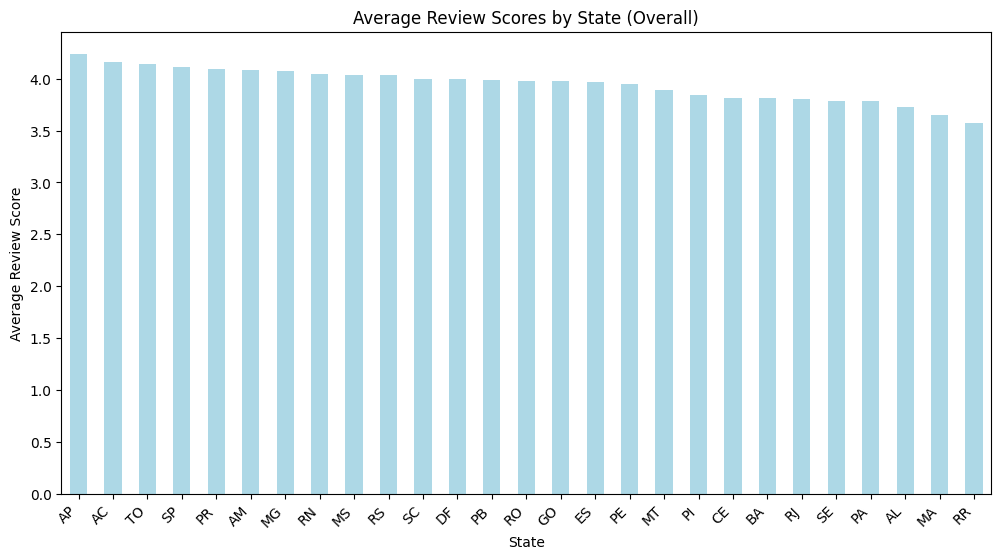

In [73]:
# Membuat bar chart rata-rata review score dari setiap state secara kesuluruhan
plt.figure(figsize=(12, 6))
average_review_score_by_state.plot(kind='bar', color='lightblue')
plt.title('Average Review Scores by State (Overall)')
plt.xlabel('State')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Rhenald Setyono\AppData\Local\Temp\ipykernel_26516\4111602775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Rhenald Setyono\AppData\Local\Temp\ipykernel_26516\4111602775.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


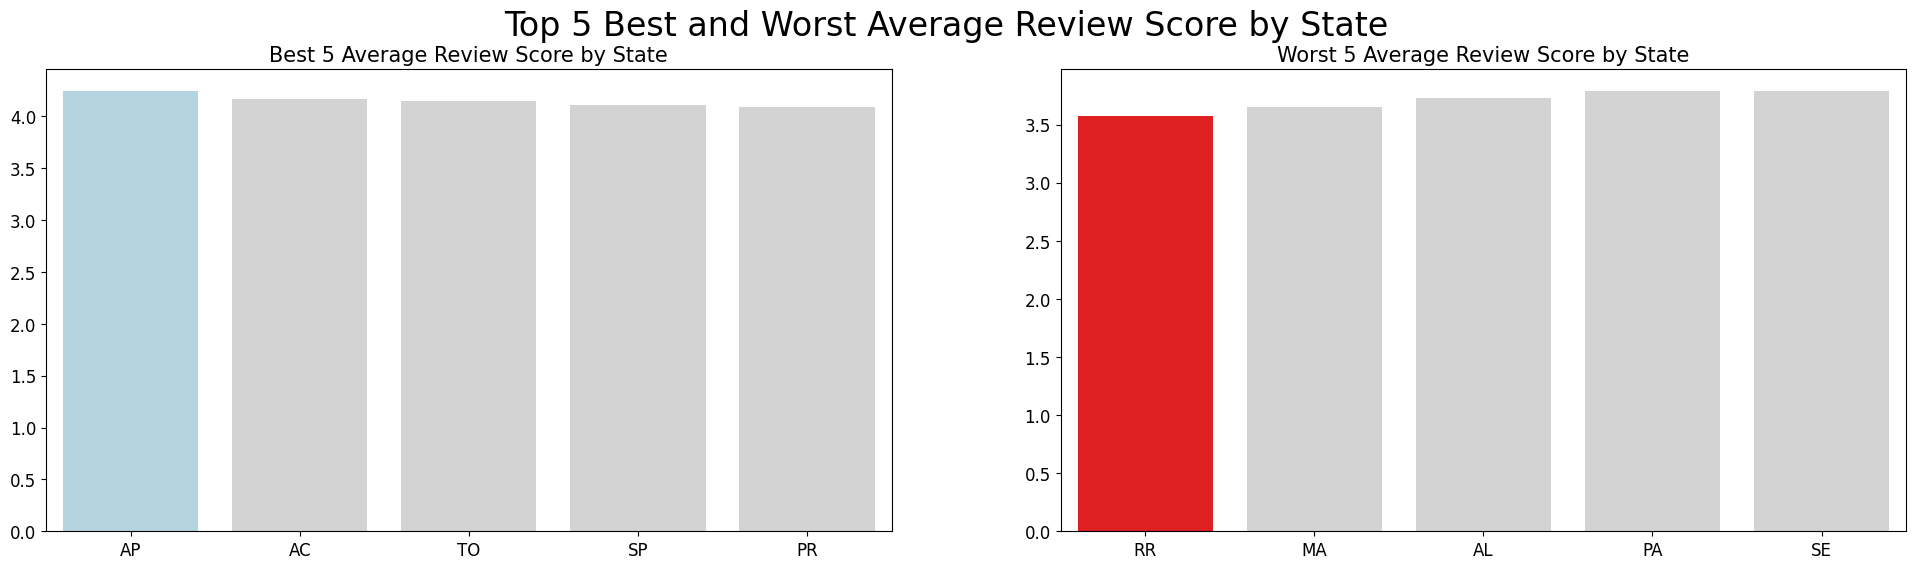

In [80]:
# Membuat bar chart rata-rata review score dari setiap state dengan menampikan 5 terbaik dan 5 terburuk
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

best_review = average_review_score_by_state.head(5)
worst_review = average_review_score_by_state.tail(5)

colors_1 = ['lightblue', 'lightgray', 'lightgray', 'lightgray', 'lightgray']
colors_2 = ['lightgray', 'lightgray', 'lightgray', 'lightgray', 'red']

sns.barplot(
    data=best_review,
    palette=colors_1,
    ax=ax[0],
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best 5 Average Review Score by State", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(
    data=worst_review,
    palette=colors_2,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].set_title("Worst 5 Average Review Score by State", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Top 5 Best and Worst Average Review Score by State", fontsize=24)
plt.show()

#### Apa kategori barang (product category) dengan revenue paling banyak dan sedikit?

C:\Users\Rhenald Setyono\AppData\Local\Temp\ipykernel_26516\3993884389.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Rhenald Setyono\AppData\Local\Temp\ipykernel_26516\3993884389.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


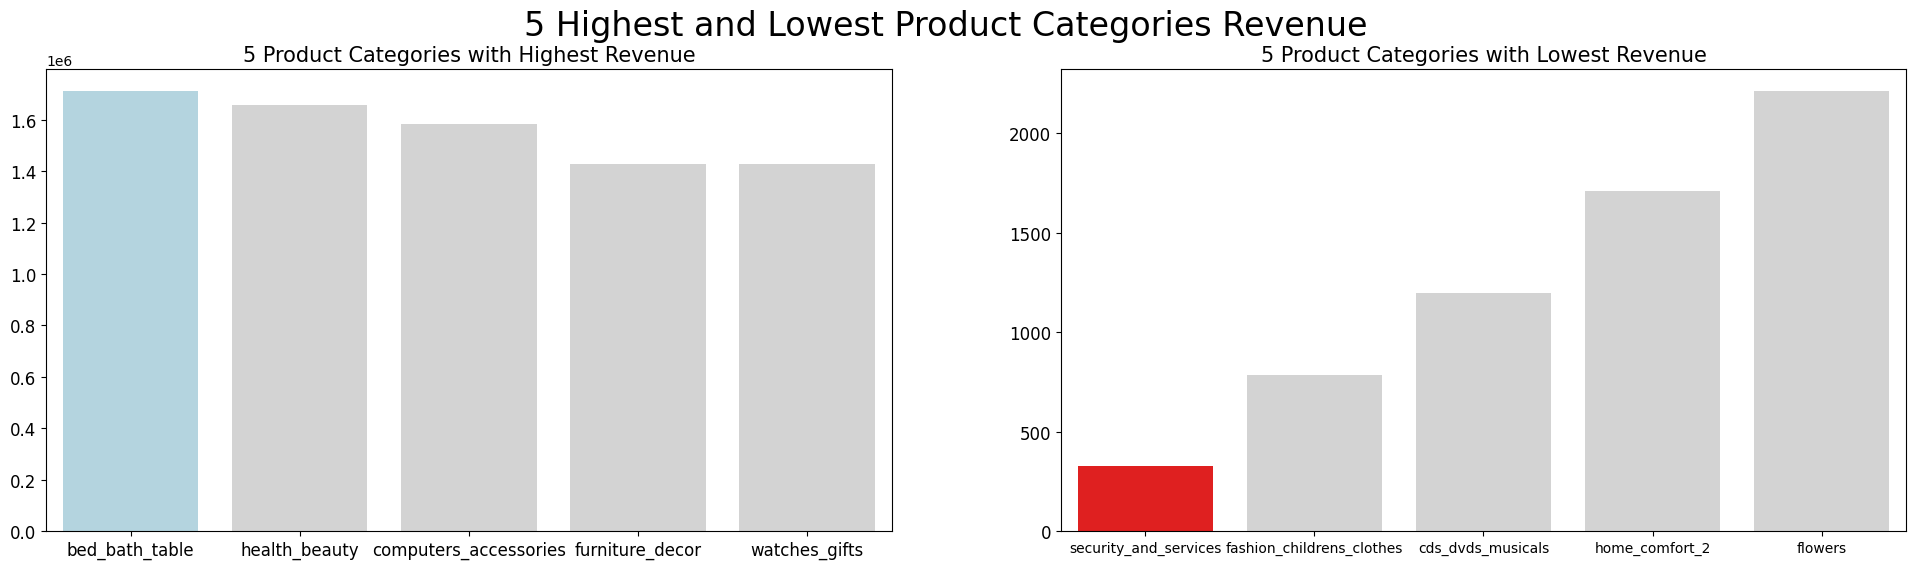

In [75]:
# Membuat bar chart kategori barang dengan revenue paling banyak dan sedikit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

best_revenue = revenue.head(5)
worst_revenue = revenue.tail(5)

colors_1 = ['lightblue', 'lightgray', 'lightgray', 'lightgray', 'lightgray']
colors_2 = ['lightgray', 'lightgray', 'lightgray', 'lightgray', 'red']

sns.barplot(
    data=best_revenue,
    palette=colors_1,
    ax=ax[0],
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("5 Product Categories with Highest Revenue", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(
    data=worst_revenue,
    palette=colors_2,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].set_title("5 Product Categories with Lowest Revenue", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("5 Highest and Lowest Product Categories Revenue", fontsize=24)
plt.show()

## Conclusion

#### Conclusion dari Pertanyaan 1

Dari hasil analisis data di atas, dapat disimpulkan bahwa rata-rata review score Olist E-Commerce pada negara bagian (state) di Brazil berkisar antara 3.5 - 4.2. State dengan rata-rata review score tertinggi adalah Amapá (AP) dan state dengan rata-rata review score terendah adalah Roraima (RR).

#### Conclusion dari Pertanyaan 2

Berdasarkan analisis data di atas, kategori produk yang memberikan revenue paling tinggi adalah bed, bath, and table sebesar 1712553.67. Sedangkan kategori produk yang memberikan revenue paling rendah adalah security and services sebesar 324.51.

In [76]:
final_df.to_csv("final_data.csv", index=False)